## Linear progression polynomial

In [31]:
from ds_discovery import Transition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
tr = Transition.from_memory()
tr.set_source_uri("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_poly.csv", header=None)
df = tr.load_source_canonical()

In [33]:
[1*df.shape[0]]

[100]

In [34]:
sub = pd.DataFrame(1, index=np.arange(df.shape[0]), columns=[0])
sub[1] = df.loc[:,[0]]
sub[2] = df[0]**2
sub.head()

,0,1,2
0,1,76.700709,5882.998700
1,1,95.273544,9077.048216
2,1,73.095723,5342.984757
3,1,46.951635,2204.456072
4,1,33.313748,1109.805806


In [35]:
X = sub.to_numpy()
Y = df[1].to_numpy()

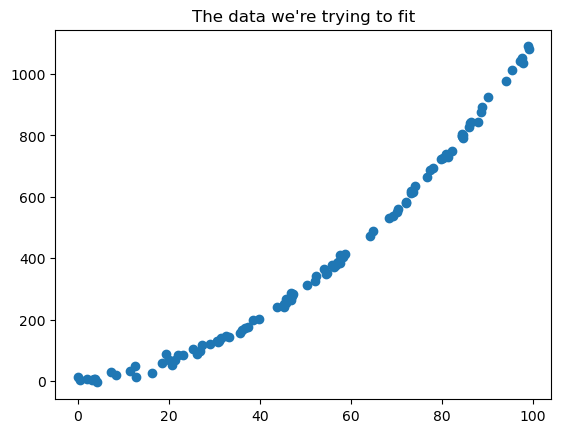

In [36]:
plt.scatter(X[:,1], Y)
plt.title("The data we're trying to fit")
plt.show()

### Calculate the weight using numpy

In [37]:
# apply the equations we learned to calculate a and b
# numpy has a special method for solving Ax = b
# so we don't use x = inv(A)*b
# note: the * operator does element-by-element multiplication in numpy
#       np.dot() does what we expect for matrix multiplication
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = X.dot(w)

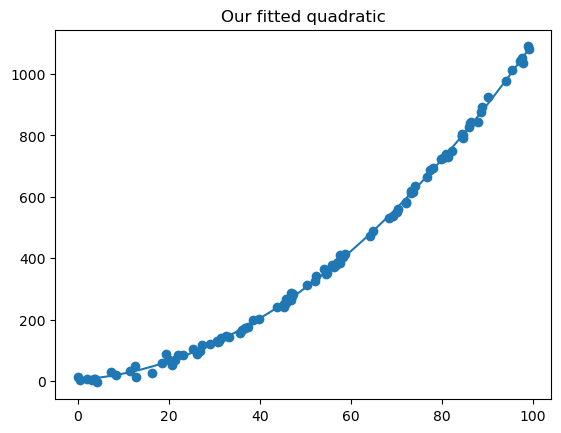

In [38]:
# let's plot everything together to make sure it worked
plt.scatter(X[:,1], Y)

# to plot our quadratic model predictions, let's
# create a line of x's and calculate the predicted y's
x_line = np.linspace(X[:,1].min(), X[:,1].max())
y_line = w[0] + w[1] * x_line + w[2] * x_line * x_line
plt.plot(x_line, y_line)
plt.title("Our fitted quadratic")
plt.show()

In [39]:
d1 = Y - Yhat
ssr = d1.dot(d1)

In [40]:
d2 = Y - Y.mean()
sst = d2.dot(d2)

In [41]:
# calculating r-squared
r2 = 1 - ssr/sst
print(f"The r-squared is: {r2}")

The r-squared is: 0.9991412296366858
